# Chapter 2 상가업소정보

In [146]:
#모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
import json

In [147]:
#폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [148]:
data=pd.read_csv("상가업소정보_201912_01.csv",sep='|',encoding="utf-8")

In [149]:
#결측치 확인
data.isna().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [150]:
data.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [151]:
#필요없는 columns drop
data.drop({'지점명','상권업종소분류코드','상권업종소분류명','표준산업분류코드','건물관리번호','건물명','구우편번호','신우편번호','동정보','층정보','호정보','시군구코드'},axis=1,inplace=True)
data.drop({'상권업종중분류코드','시도코드','행정동코드','지번본번지','지번부번지','지번주소','도로명코드','도로명','건물본번지','건물부번지'},axis=1,inplace=True)
data.drop({'상가업소번호','표준산업분류명','행정동명','법정동코드','법정동명','지번코드','대지구분코드','대지구분명'},axis=1,inplace=True)
data.drop('상권업종대분류코드',axis=1,inplace=True)

In [152]:
data['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [153]:
data_food=data.loc[data['상권업종중분류명']=='커피점/카페']

In [154]:
data_food

,상호명,상권업종대분류명,상권업종중분류명,시도명,시군구명,도로명주소,경도,위도
1,커피빈코리아선릉로93길점,음식,커피점/카페,서울특별시,강남구,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
10,커피빈,음식,커피점/카페,서울특별시,서초구,서울특별시 서초구 서초중앙로 118,127.014217,37.492388
12,고려대학교교육관쎄리오점,음식,커피점/카페,서울특별시,성북구,서울특별시 성북구 안암로 145,127.031702,37.588485
15,스완카페트,음식,커피점/카페,서울특별시,영등포구,서울특별시 영등포구 도신로10가길 11-1,126.897710,37.503693
21,왕실,음식,커피점/카페,서울특별시,중구,서울특별시 중구 남대문로 52-13,126.982419,37.562274
...,...,...,...,...,...,...,...,...
573621,디에이치앤카페테리아,음식,커피점/카페,서울특별시,송파구,서울특별시 송파구 삼학사로 42,127.097097,37.500835
573622,식물학커피로스터스,음식,커피점/카페,서울특별시,용산구,서울특별시 용산구 서빙고로67길 21,126.994751,37.521364
573623,간단하지만특별한화피디Cafe,음식,커피점/카페,서울특별시,구로구,서울특별시 구로구 도림로 101,126.894024,37.491378
573651,테이큰커피,음식,커피점/카페,서울특별시,성동구,서울특별시 성동구 마조로 33,127.041072,37.560638


지도에 표시하기

In [155]:
data.drop('도로명주소',axis=1,inplace=True)

In [156]:
seoul=data.loc[data['시도명']=='서울특별시']

In [157]:
name=seoul['시군구명'].unique()

In [158]:
name

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [159]:
seoul.drop('시도명','도로명주소',axis=1,inplace=True)

TypeError: drop() got multiple values for argument 'axis'

In [160]:
seoul_food=seoul.loc[seoul['상권업종대분류명']=='음식']

In [161]:
seoul_cafe=seoul.loc[seoul['상권업종중분류명']=='커피점/카페']

In [162]:
seoul_cafe.drop({'상권업종대분류명','상권업종중분류명'},axis=1,inplace=True)

C:\Users\suyeo\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='경도', ylabel='위도'>

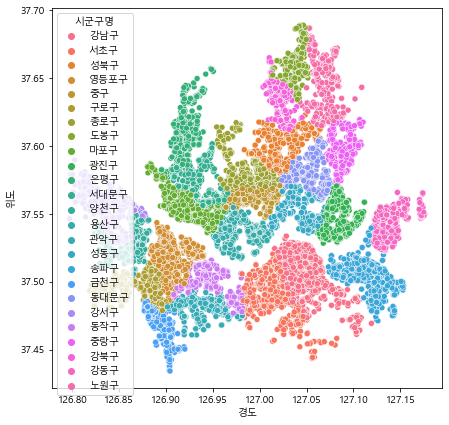

In [163]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=seoul_cafe, x='경도',y='위도',color='navy',hue='시군구명')

In [164]:
cafe=seoul_cafe.loc[seoul_cafe['상호명']=='간단하지만특별한화피디Cafe']

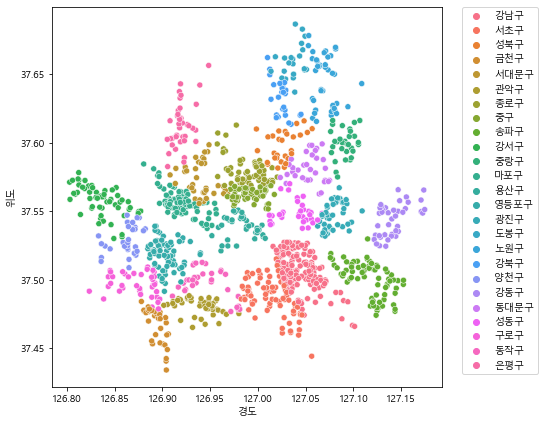

In [165]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=cafe, x='경도',y='위도',color='navy',hue='시군구명')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [166]:
cafe.describe()

,경도,위도
count,1198.000000,1198.000000
mean,126.991432,37.542449
std,0.082115,0.048160
min,126.802937,37.434157
25%,126.920143,37.503385
50%,127.002465,37.540291
75%,127.051608,37.570306
max,127.174770,37.686823


In [167]:
m=folium.Map(location=[37.540291,127.002465,],zoom_start=13)

In [169]:
cafe

,상호명,시도명,시군구명,경도,위도
7730,간단하지만특별한화피디Cafe,서울특별시,강남구,127.063815,37.494233
14202,간단하지만특별한화피디Cafe,서울특별시,서초구,127.012347,37.480667
15878,간단하지만특별한화피디Cafe,서울특별시,강남구,127.032971,37.510465
26257,간단하지만특별한화피디Cafe,서울특별시,강남구,127.023566,37.516974
44216,간단하지만특별한화피디Cafe,서울특별시,성북구,127.056891,37.610395
...,...,...,...,...,...
571511,간단하지만특별한화피디Cafe,서울특별시,중구,126.973759,37.560703
571793,간단하지만특별한화피디Cafe,서울특별시,노원구,127.066216,37.638158
572309,간단하지만특별한화피디Cafe,서울특별시,은평구,126.919569,37.634843
573618,간단하지만특별한화피디Cafe,서울특별시,강서구,126.811809,37.573718


In [171]:
for i in range(0,1198):
    folium.Circle(location=[cafe.iloc[i,4],cafe.iloc[i,3]],radius=20,color='navy').add_to(m)

In [172]:
m

In [ ]:
sns.catplot(data=seoul,x='경도',y='위도')